In [1]:
import pandas as pd
import math
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 400
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
import matplotlib.pyplot as plt

# FAA quarter-hour data

## Most common combinations of arrival runway configuration

In [2]:
qh = pd.read_pickle('ASPM_Quarter_Hour_SF2019.pkl')
qh

,LOCID,YYYYMM,DAYNUM,HR_LOCAL,QTR,DEP_CT,ARR_CT,T_O_GATE_DELAY,T_O_GATE_DELAY_A,T_GATE_DELAY,...,WND_ANGL,WND_SPED,RUNWAY,DEP_DEMAND,ARR_DEMAND,DEP_RATE,ARR_RATE,DEP_SCORE,ARR_SCORE,TOT_UTIL
5688960,SFO,201901,1,0,1,6,2,56.0,18.666667,56.0,...,020,16,"28L, 28R | 1L, 1R ...",6,2,12,12,100.00,100.0,100.00
5688961,SFO,201901,1,0,2,2,2,38.0,12.666667,38.0,...,020,16,"28L, 28R | 1L, 1R ...",2,2,12,11,100.00,100.0,100.00
5688962,SFO,201901,1,0,3,6,0,69.0,17.250000,69.0,...,020,16,"28L, 28R | 1L, 1R ...",6,0,12,11,100.00,0.0,100.00
5688963,SFO,201901,1,0,4,5,3,12.0,6.000000,12.0,...,360,17,"28L, 28R | 1L, 1R ...",5,3,12,11,100.00,100.0,100.00
5688964,SFO,201901,1,1,1,2,2,0.0,0.000000,0.0,...,360,17,"28L, 28R | 1L, 1R ...",2,2,12,12,100.00,100.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723995,SFO,201912,31,22,4,7,6,60.0,5.454546,60.0,...,160,5,"28L, 28R | 1L, 1R ...",7,6,12,13,100.00,100.0,100.00
5723996,SFO,201912,31,23,1,6,4,15.0,3.000000,15.0,...,160,5,"28L, 28R | 1L, 1R ...",7,4,13,14,85.71,100.0,90.91
5723997,SFO,201912,31,23,2,10,3,25.0,3.571429,30.0,...,160,5,"28L, 28R | 1L, 1R ...",10,3,13,14,100.00,100.0,100.00
5723998,SFO,201912,31,23,3,7,1,4.0,0.666667,4.0,...,160,5,"28L, 28R | 1L, 1R ...",7,1,12,13,100.00,100.0,100.00


In [3]:
qh[['RUNWAY_A', 'RUNWAY_D']] =qh['RUNWAY'].str.split('|', expand=True)
qh[qh['MC']=='I'].groupby('RUNWAY_A').size().sort_values(ascending=False)

RUNWAY_A
28L, 28R     6664
19L          1284
28R           239
28L           117
19L, 19R       40
10L, 10R        8
10L             5
dtype: int64

In [4]:
qh[qh['MC']=='V'].groupby('RUNWAY_A').size().sort_values(ascending=False)

RUNWAY_A
28L, 28R     24406
28R           1162
19L            696
19L, 19R       200
28L            111
                63
10L, 10R        45
dtype: int64

# Individual flight data

## The 30th busiest day

In [5]:
fl = pd.read_pickle('ASPM_Flight_Level_SF2019.pkl')
fl

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,OAG_S_ARR,T_OAG_S_AR,ADJ_OAG_ARR,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR
8,201901,2,13,1,201901,2,8,2,201901,2,...,1230912930,08:15,1230912930,08:15,1230913140,08:19,10.0,3,4,4
9,201901,4,13,1,201901,4,8,3,201901,4,...,1231086930,08:35,1231086930,08:35,1231087020,08:37,8.0,1,2,2
10,201901,6,12,4,201901,6,8,2,201901,6,...,1231258890,08:21,1231258890,08:21,1231259160,08:26,11.0,4,5,5
11,201901,7,12,4,201901,7,8,3,201901,7,...,1231345950,08:32,1231345950,08:32,1231346520,08:42,16.0,9,10,10
12,201901,9,12,4,201901,9,8,3,201901,9,...,1231519290,08:41,1231519290,08:41,1231519080,08:38,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005735,201906,2,9,3,201906,2,10,3,201906,2,...,1243964610,10:43,1243964610,10:43,1243974120,13:22,5.0,6,159,159
15005760,201904,29,10,4,201904,29,11,4,201904,29,...,1241031378,11:56,1241031378,11:56,1241034943,12:55,1.0,5,59,59
15005849,201904,29,12,4,201904,29,13,2,201904,29,...,1241036735,13:25,1241036735,13:25,1241038811,14:00,0.0,5,35,35
15005969,201908,15,18,1,201908,15,18,4,201908,15,...,1250387153,18:45,1250387153,18:45,1250386791,18:39,2.0,5,0,0


In [6]:
fl_19_dep = fl[(fl['DEP_YYYYMM'].isin(range(201901, 201913)) & (fl['DEP_LOCID']=='SFO'))]
fl_19_arr = fl[(fl['ARR_YYYYMM'].isin(range(201901, 201913)) & (fl['ARR_LOCID']=='SFO'))]

In [7]:
count_dep = fl_19_dep.groupby(['DEP_YYYYMM', 'DEP_DAY']).size().to_frame(name='Deps').reset_index()
count_arr = fl_19_arr.groupby(['ARR_YYYYMM', 'ARR_DAY']).size().to_frame(name='Arrs').reset_index()

In [8]:
count = pd.DataFrame(columns=['YYYYMM', 'Day'], data=count_arr[['ARR_YYYYMM', 'ARR_DAY']].values)
count['Ops'] = count_dep['Deps'] + count_arr['Arrs']
count

,YYYYMM,Day,Ops
0,201901,1,1157
1,201901,2,1268
2,201901,3,1229
3,201901,4,1254
4,201901,5,1054
...,...,...,...
360,201912,27,1208
361,201912,28,1177
362,201912,29,1203
363,201912,30,1236


In [9]:
count[count['Ops']==count['Ops'].nlargest(30).iloc[-1]]

,YYYYMM,Day,Ops
191,201907,11,1354


## The 15th busiest day

In [10]:
count[count['Ops']==count['Ops'].nlargest(15).iloc[-1]]

,YYYYMM,Day,Ops
218,201908,7,1401


## The average day of the peak month

In [11]:
count.groupby('YYYYMM').mean().sort_values(by='Ops', ascending=False)

,Day,Ops
YYYYMM,,
201908,16.0,1375.451613
201907,16.0,1304.741935
201906,15.5,1284.033333
201910,16.0,1210.741935
201905,16.0,1204.967742
201904,15.5,1193.333333
201903,16.0,1168.225806
201911,15.5,1162.900000
201912,16.0,1152.193548


In [12]:
count[(count['YYYYMM']==201908) & count['Ops'].isin(range(1370, 1380))].sort_values(by='Ops')

,YYYYMM,Day,Ops
217,201908,6,1371
230,201908,19,1371
212,201908,1,1372
215,201908,4,1373
229,201908,18,1375


# Arrival capacity estimation

In [13]:
aircraft = pd.read_csv('FAA-Aircraft-Char-Database-v2-201810.csv')
aircraft

,Date Completed,Manufacturer,Model,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,...,MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-Jul-3,Acro Sport,Acro Sport,Piston,1,A,I,1A,56.0,no winglets,...,tbd,"1,350","1,520",S,ACRO,L,Small Eqpt,tbd,tbd,343
1,2018-Jun-1,Acro Sport,Acro Sport II,Piston,1,A,I,1A,60.0,no winglets,...,tbd,"1,520","1,520",S,ACR2,L,Small Eqpt,tbd,tbd,409
2,2018-Jul-3,Acro Sport,Cougar,Piston,1,A,I,1A,46.0,no winglets,...,tbd,"1,250","1,250",S,COUG,L,Small Eqpt,tbd,tbd,388
3,2018-Jul-3,Acro Sport,Junior Ace,Piston,1,A,I,1A,49.0,no winglets,...,tbd,"1,225","1,225",S,JACE,L,Small Eqpt,tbd,tbd,477
4,2018-Jul-3,Acro Sport,Super Ace,Piston,1,A,I,1A,49.0,no winglets,...,tbd,"1,030","1,030",S,SACE,L,Small Eqpt,tbd,tbd,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,NaN,Zlin,Zlin Z-50,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,BA11,M,tbd,tbd,tbd,#VALUE!
2760,NaN,Zlin,Zlin Z-526 Akrobat,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,#VALUE!
2761,NaN,Zlin,Zlin Z-526 Trener Master,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,#VALUE!
2762,NaN,Zlin,Zlin Z-626,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,#VALUE!


In [14]:
# 08/19/2019 is also selected considering the difference in scheduled and actual arrival times
fl_0818 = fl_19_arr[(fl_19_arr['ARR_YYYYMM']==201908) & ((fl_19_arr['ARR_DAY']==18) | (fl_19_arr['ARR_DAY']==19))]
fl_0818 = fl_0818.assign(Weight=0, Vref=0, Time=[(t-1250619900+41100)/3600 for t in fl_0818['OOOI_ARR']])

In [15]:
fl_1 = fl_0818[(fl_0818['Time']>=6) & (fl_0818['Time']<24)]
fl_1

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR,Weight,Vref,Time
129,201908,18,13,3,201908,18,11,2,201908,18,...,11:26,1250619900,11:25,5.0,0,0,0,0,0,11.416667
48052,201908,18,7,1,201908,18,10,2,201908,18,...,10:18,1250615040,10:04,0.3,0,0,0,0,0,10.066667
75204,201908,18,13,1,201908,18,14,4,201908,18,...,14:50,1250633580,15:13,6.3,0,23,23,0,0,15.216667
95214,201908,18,10,4,201908,18,13,4,201908,18,...,13:59,1250629740,14:09,2.3,16,10,10,0,0,14.150000
131689,201908,18,7,2,201908,18,8,4,201908,18,...,08:58,1250610300,08:45,1.3,0,0,0,0,0,8.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921138,201908,18,10,3,201908,18,12,2,201908,18,...,13:39,1250629320,14:02,12.0,3,96,23,0,0,14.033333
14923834,201908,18,17,3,201908,18,19,3,201908,18,...,19:36,1250650140,19:49,1.0,0,13,13,0,0,19.816667
14935597,201908,18,12,3,201908,18,15,1,201908,18,...,15:03,1250632800,15:00,4.0,0,0,0,0,0,15.000000
14935960,201908,18,19,1,201908,18,21,3,201908,18,...,21:33,1250656980,21:43,3.0,5,10,10,0,0,21.716667


In [16]:
list_air = list(aircraft['ICAO Code'].unique())
df1 = fl_1[fl_1['ETMS_EQPT'].isin(list_air)].reset_index()
df2 = fl_1[~fl_1['ETMS_EQPT'].isin(list_air)]

In [17]:
def weight_class(m, icao):
    if m == 'tbd':
        return 'tbd'
    elif icao == 'B752' or icao == 'B753' or icao == 'B754':
        return 'B757'
    else:
        m = float(m.replace(',', ''))
        if m <= 4.1e4:
            return 'Small'
        elif m <= 3e5:
            return 'Large'
        else:
            return 'Heavy'

In [18]:
df1['Weight'] = [weight_class(aircraft[aircraft['ICAO Code']==df1.loc[i, 'ETMS_EQPT']].iloc[0]['MTOW'],
                              aircraft[aircraft['ICAO Code']==df1.loc[i, 'ETMS_EQPT']].iloc[0]['ICAO Code']) for i in df1.index]
df1['Vref'] = [aircraft[aircraft['ICAO Code']==df1.loc[i, 'ETMS_EQPT']].iloc[0]['Approach Speed\n(Vref)'] for i in df1.index]
df3 = df1[(df1['Weight']=='tbd') | df1['Vref'].isnull()]
df1 = df1[(df1['Weight']!='tbd') & ~(df1['Vref'].isnull())]

In [19]:
df3.groupby('ETMS_EQPT').size()

ETMS_EQPT
B77L    2
C68A    2
CRJ9    5
dtype: int64

In [20]:
# Boeing
df31 = df3[df3['ETMS_EQPT']=='B77L'].assign(Weight='Heavy', Vref=140)
# Cessna
df36 = df3[df3['ETMS_EQPT']=='C68A'].assign(Weight='Small', Vref=125)
# Bombardier
df32 = df3[df3['ETMS_EQPT']=='CRJ9'].assign(Weight='Large', Vref=140)

In [21]:
df2.groupby('ETMS_EQPT').size()

ETMS_EQPT
         1
A20N     1
A21N     4
A339     1
B78X     2
CL35     1
E75L    69
dtype: int64

In [22]:
# Manual completion
# Airbus
df21 = df2[df2['ETMS_EQPT']=='A20N'].assign(Weight='Large', Vref=136)
df22 = df2[df2['ETMS_EQPT']=='A21N'].assign(Weight='Large', Vref=140)
df23 = df2[df2['ETMS_EQPT']=='A339'].assign(Weight='Heavy', Vref=137)
# Boeing
df24 = df2[df2['ETMS_EQPT']=='B78X'].assign(Weight='Heavy', Vref=140)
# Bombardier
df25 = df2[df2['ETMS_EQPT']=='CL35'].assign(Weight='Small', Vref=125)
# Embraer
df26 = df2[df2['ETMS_EQPT']=='E75L'].assign(Weight='Large', Vref=124)

In [23]:
fl_2 = pd.concat([df1, df21, df22, df23, df24, df25, df26, df31, df32])
fl_2

,index,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,...,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR,Weight,Vref,Time
0,48052.0,201908,18,7,1,201908,18,10,2,201908,...,10:18,1250615040,10:04,0.3,0,0,0,Large,140.0,10.066667
1,75204.0,201908,18,13,1,201908,18,14,4,201908,...,14:50,1250633580,15:13,6.3,0,23,23,Large,140.0,15.216667
2,95214.0,201908,18,10,4,201908,18,13,4,201908,...,13:59,1250629740,14:09,2.3,16,10,10,Large,140.0,14.150000
3,131689.0,201908,18,7,2,201908,18,8,4,201908,...,08:58,1250610300,08:45,1.3,0,0,0,Large,140.0,8.750000
4,172432.0,201908,18,6,3,201908,18,9,1,201908,...,09:00,1250612700,09:25,0.3,27,25,25,Large,142.0,9.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,8162149.0,201908,18,19,2,201908,18,21,2,201908,...,21:15,1250656980,21:43,3.0,0,28,28,Large,140.0,21.716667
225,8163277.0,201908,18,7,4,201908,18,9,4,201908,...,09:45,1250613780,09:43,0.0,0,0,0,Large,140.0,9.716667
226,8167326.0,201908,18,16,2,201908,18,18,2,201908,...,18:27,1250646300,18:45,24.0,30,25,18,Large,140.0,18.750000
227,8171728.0,201908,18,8,4,201908,18,11,2,201908,...,11:20,1250619720,11:22,18.0,0,2,2,Large,140.0,11.366667


In [24]:
fl_2.groupby('Weight').size()

Weight
B757      35
Heavy     92
Large    501
Small      8
dtype: int64

In [25]:
fl_06_10 = fl_2[fl_2['Time']<10].sort_values('Time').reset_index()
fl_10_14 = fl_2[(fl_2['Time']>=10) & (fl_2['Time']<14)].sort_values('Time').reset_index()
fl_14_18 = fl_2[(fl_2['Time']>=14) & (fl_2['Time']<18)].sort_values('Time').reset_index()
fl_18_24 = fl_2[fl_2['Time']>=18].sort_values('Time').reset_index()

## VMC capacity

In [26]:
def delta_VMC(w1, w2):
    if w1 == 'Small':
        return 1.9
    elif w1 == 'Large':
        if w2 == 'Small':
            return 2.7
        else:
            return 1.9
    elif w1 == 'B757':
        if w2 == 'Small':
            return 3.7
        elif w2 == 'Large' or w2 == 'B757':
            return 2.9
        else:
            return 2.7
    else:
        if w2 == 'Small':
            return 4.5
        elif w2 == 'Large' or w2 == 'B757':
            return 3.6
        else:
            return 2.7

In [27]:
def delta_IMC(w1, w2):
    if w1 == 'Small':
        return 2.5 + .5
    elif w1 == 'Large':
        if w2 == 'Small':
            return 4 + .5
        else:
            return 2.5 + .5
    elif w1 == 'B757':
        if w2 == 'Small':
            return 5 + .5
        else:
            return 4 + .5
    else:
        if w2 == 'Small':
            return 6 + .5
        elif w2 == 'Large' or w2 == 'B757':
            return 5 + .5
        else:
            return 4 + .5

In [28]:
def tau(v1, v2, delta, L):
    if v2 < v1:
        return delta/v1 + L*(1/v2 - 1/v1)
    else:
        return delta/v2

In [29]:
def capacity(fl, w):
    if w == 'VMC':
        delta = [delta_VMC(v1, v2) for v1, v2 in zip(fl[:-1]['Weight'], fl[1:]['Weight'])]
    else:
        delta = [delta_IMC(v1, v2) for v1, v2 in zip(fl[:-1]['Weight'], fl[1:]['Weight'])]
    time = [tau(v1, v2, delta, L) for v1, v2, delta, L in zip(fl[:-1]['Vref'], fl[1:]['Vref'], delta, [6 for i in fl.index[:-1]])]
    avg_time = sum(time) / (len(fl)-1)
    return 1 / avg_time

In [30]:
cap_06_10_VMC = 2 * capacity(fl_06_10, 'VMC')
print(f'VMC Capacity in 6-10 = {cap_06_10_VMC:.2f} flight/hr')

VMC Capacity in 6-10 = 121.22 flight/hr


In [31]:
cap_10_14_VMC = 2 * capacity(fl_10_14, 'VMC')
print(f'VMC Capacity in 10-14 = {cap_10_14_VMC:.2f} flight/hr')

VMC Capacity in 10-14 = 115.30 flight/hr


In [32]:
cap_14_18_VMC = 2 * capacity(fl_14_18, 'VMC')
print(f'VMC Capacity in 14-18 = {cap_14_18_VMC:.2f} flight/hr')

VMC Capacity in 14-18 = 114.49 flight/hr


In [33]:
cap_18_24_VMC = 2 * capacity(fl_18_24, 'VMC')
print(f'VMC Capacity in 18-24 = {cap_18_24_VMC:.2f} flight/hr')

VMC Capacity in 18-24 = 119.98 flight/hr


## IMC capacity

In [34]:
cap_06_10_IMC = capacity(fl_06_10, 'IMC')
print(f'IMC Capacity in 6-10 = {cap_06_10_IMC:.2f} flight/hr')

IMC Capacity in 6-10 = 39.81 flight/hr


In [35]:
cap_10_14_IMC = capacity(fl_10_14, 'IMC')
print(f'IMC Capacity in 10-14 = {cap_10_14_IMC:.2f} flight/hr')

IMC Capacity in 10-14 = 37.76 flight/hr


In [36]:
cap_14_18_IMC = capacity(fl_14_18, 'IMC')
print(f'IMC Capacity in 14-18 = {cap_14_18_IMC:.2f} flight/hr')

IMC Capacity in 14-18 = 37.62 flight/hr


In [37]:
cap_18_24_IMC = capacity(fl_18_24, 'IMC')
print(f'IMC Capacity in 18-24 = {cap_18_24_IMC:.2f} flight/hr')

IMC Capacity in 18-24 = 39.28 flight/hr


# Queuing diagram and the average delay per flight

## An all-VMC day

In [38]:
fl_0818 = fl_0818.assign(SchTime=[(t-1250619990+41160)/3600 for t in fl_0818['OAG_S_ARR']])
fl_3 = fl_0818[fl_0818['SchTime']<24].sort_values('SchTime').reset_index()
fl_3

,index,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,...,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR,Weight,Vref,Time,SchTime
0,228816,201908,17,22,2,201908,18,0,1,201908,...,1250579880,00:18,12.3,3,12,12,0,0,0.300000,0.091667
1,1531154,201908,17,23,1,201908,18,0,1,201908,...,1250579301,00:08,3.0,9,2,2,0,0,0.139167,0.105000
2,3228148,201908,17,18,3,201908,18,0,1,201908,...,1250577660,23:41,10.0,0,0,0,0,0,-0.316667,0.125000
3,4828916,201908,17,21,4,201908,18,0,1,201908,...,1250579280,00:08,7.0,0,0,0,0,0,0.133333,0.125000
4,3413721,201908,17,22,4,201908,18,0,1,201908,...,1250577720,23:42,0.0,0,0,0,0,0,-0.300000,0.141667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,913602,201908,18,20,4,201908,18,23,4,201908,...,1250672400,02:00,4.3,137,130,130,0,0,26.000000,23.825000
676,6623272,201908,18,22,1,201908,18,23,4,201908,...,1250664900,23:55,18.0,8,0,0,0,0,23.916667,23.958333
677,4650718,201908,18,22,4,201908,18,23,4,201908,...,1250664720,23:52,22.0,0,0,0,0,0,23.866667,23.958333
678,7513342,201908,18,20,1,201908,18,23,4,201908,...,1250670780,01:33,1.1,101,95,95,0,0,25.550000,23.958333


In [39]:
def queuing(fl, cap1, cap2, cap3, cap4, w):
    plt.plot([0]+list(fl['SchTime']), list(fl.index)+[len(fl)], label='Scheduled')
    time = [0]
    delay = 0
    for i in fl.index:
        ts = fl.loc[i, 'SchTime']
        if time[-1] < 10:
            tc = time[-1] + 1/cap1
        elif time[-1] < 14:
            tc = time[-1] + 1/cap2
        elif time[-1] < 18:
            tc = time[-1] + 1/cap3
        else:
            tc = time[-1] + 1/cap4
        time.append(max(tc, ts))
        delay += (tc-ts) * (tc>ts)
    plt.plot(time, list(fl.index)+[len(fl)], label='Capacity')
    plt.plot([fl['SchTime'].iloc[-1], time[-1]], [len(fl), len(fl)], c='#1f77b4')
    plt.xlabel('Time (h)')
    plt.xticks([3*i for i in range(9)])
    plt.ylabel('Cumulative number of arrivals')
    plt.legend()
    plt.title(f'Queuing diagram ({w})')
    plt.savefig(f'{w}.png', bbox_inches='tight')
    plt.show()
    return delay / len(fl) * 60

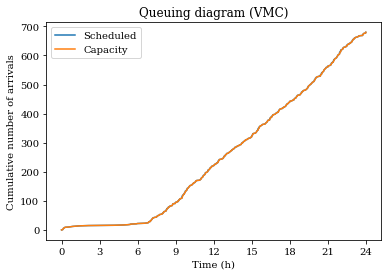

In [40]:
delay_VMC = queuing(fl_3, cap_06_10_VMC, cap_10_14_VMC, cap_14_18_VMC, cap_18_24_VMC, 'VMC')

In [41]:
print(f'Average delay (VMC) = {delay_VMC:.2f} min/flight')

Average delay (VMC) = 0.32 min/flight


## An all-IMC day

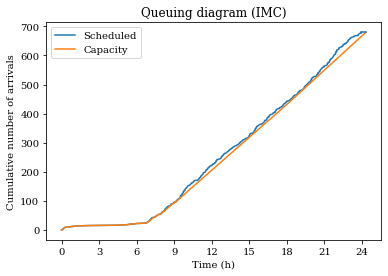

In [42]:
delay_IMC = queuing(fl_3, cap_06_10_IMC, cap_10_14_IMC, cap_14_18_IMC, cap_18_24_IMC, 'IMC')

In [43]:
print(f'Average delay (IMC) = {delay_IMC:.2f} min/flight')

Average delay (IMC) = 17.28 min/flight


# 2030 design day schedule

In [44]:
def queuing_new(fl, cap1, cap2, cap3, cap4, w):
    c = 1.2785
    plt.plot([0]+list(fl['SchTime']), [c*x for x in (list(fl.index)+[len(fl)])], label='Scheduled')
    time = [0]
    delay = 0
    for i in fl.index:
        ts = fl.loc[i, 'SchTime']
        if time[-1] < 10:
            tc = time[-1] + c/cap1
        elif time[-1] < 14:
            tc = time[-1] + c/cap2
        elif time[-1] < 18:
            tc = time[-1] + c/cap3
        else:
            tc = time[-1] + c/cap4
        time.append(max(tc, ts))
        delay += (tc-ts) * (tc>ts)
    plt.plot(time, [c*x for x in (list(fl.index)+[len(fl)])], label='Capacity')
    plt.plot([fl['SchTime'].iloc[-1], time[-1]], [c*len(fl), c*len(fl)], c='#1f77b4')
    plt.xlabel('Time (h)')
    plt.xticks([3*i for i in range(math.ceil(time[-1]/3)+1)])
    plt.ylabel('Cumulative number of arrivals')
    plt.legend()
    plt.title(f'Queuing diagram ({w})')
    plt.savefig(f'{w} new.png', bbox_inches='tight')
    plt.show()
    return delay / (c*len(fl)) * 60

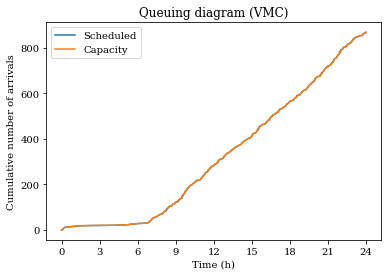

In [45]:
delay_VMC_n = queuing_new(fl_3, cap_06_10_VMC, cap_10_14_VMC, cap_14_18_VMC, cap_18_24_VMC, 'VMC')

In [46]:
print(f'Average delay in 2030 (VMC) = {delay_VMC_n:.2f} min/flight')

Average delay in 2030 (VMC) = 0.38 min/flight


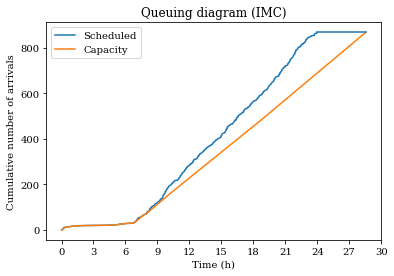

In [47]:
delay_IMC_n = queuing_new(fl_3, cap_06_10_IMC, cap_10_14_IMC, cap_14_18_IMC, cap_18_24_IMC, 'IMC')

In [48]:
print(f'Average delay in 2030 (IMC) = {delay_IMC_n:.2f} min/flight')

Average delay in 2030 (IMC) = 102.32 min/flight
